In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                  '/ccs/proj/cfd162/lcheung/amrwind-frontend/',
                ]
import sys, os, shutil, io
import numpy as np
for x in amrwindfedirs: sys.path.insert(1, x)

from functools import partial
import matplotlib.pyplot as plt
import pandas as pd 


In [2]:
df_27_C  = pd.read_csv('../results/neutral_CGrid_E_spectra_Z027.csv')
df_90_C  = pd.read_csv('../results/neutral_CGrid_E_spectra_Z090.csv')
df_153_C = pd.read_csv('../results/neutral_CGrid_E_spectra_Z153.csv')

df_35_D  = pd.read_csv('../results/neutral_DGrid_E_spectra_Z035.csv')
df_27_D  = pd.read_csv('../results/neutral_DGrid_E_spectra_Z027.csv')
df_90_D  = pd.read_csv('../results/neutral_DGrid_E_spectra_Z090.csv')
df_153_D = pd.read_csv('../results/neutral_DGrid_E_spectra_Z153.csv')
df_315_D = pd.read_csv('../results/neutral_DGrid_E_spectra_Z315.csv')

In [3]:
ustar_C=0.208411
zi_C = 352.066531

ustar_D= 0.203669
zi_D= 337.048425

a1d = 0.5
ah = 0.54 * (55/18) * a1d

### Wavenumber spectra (C grid)

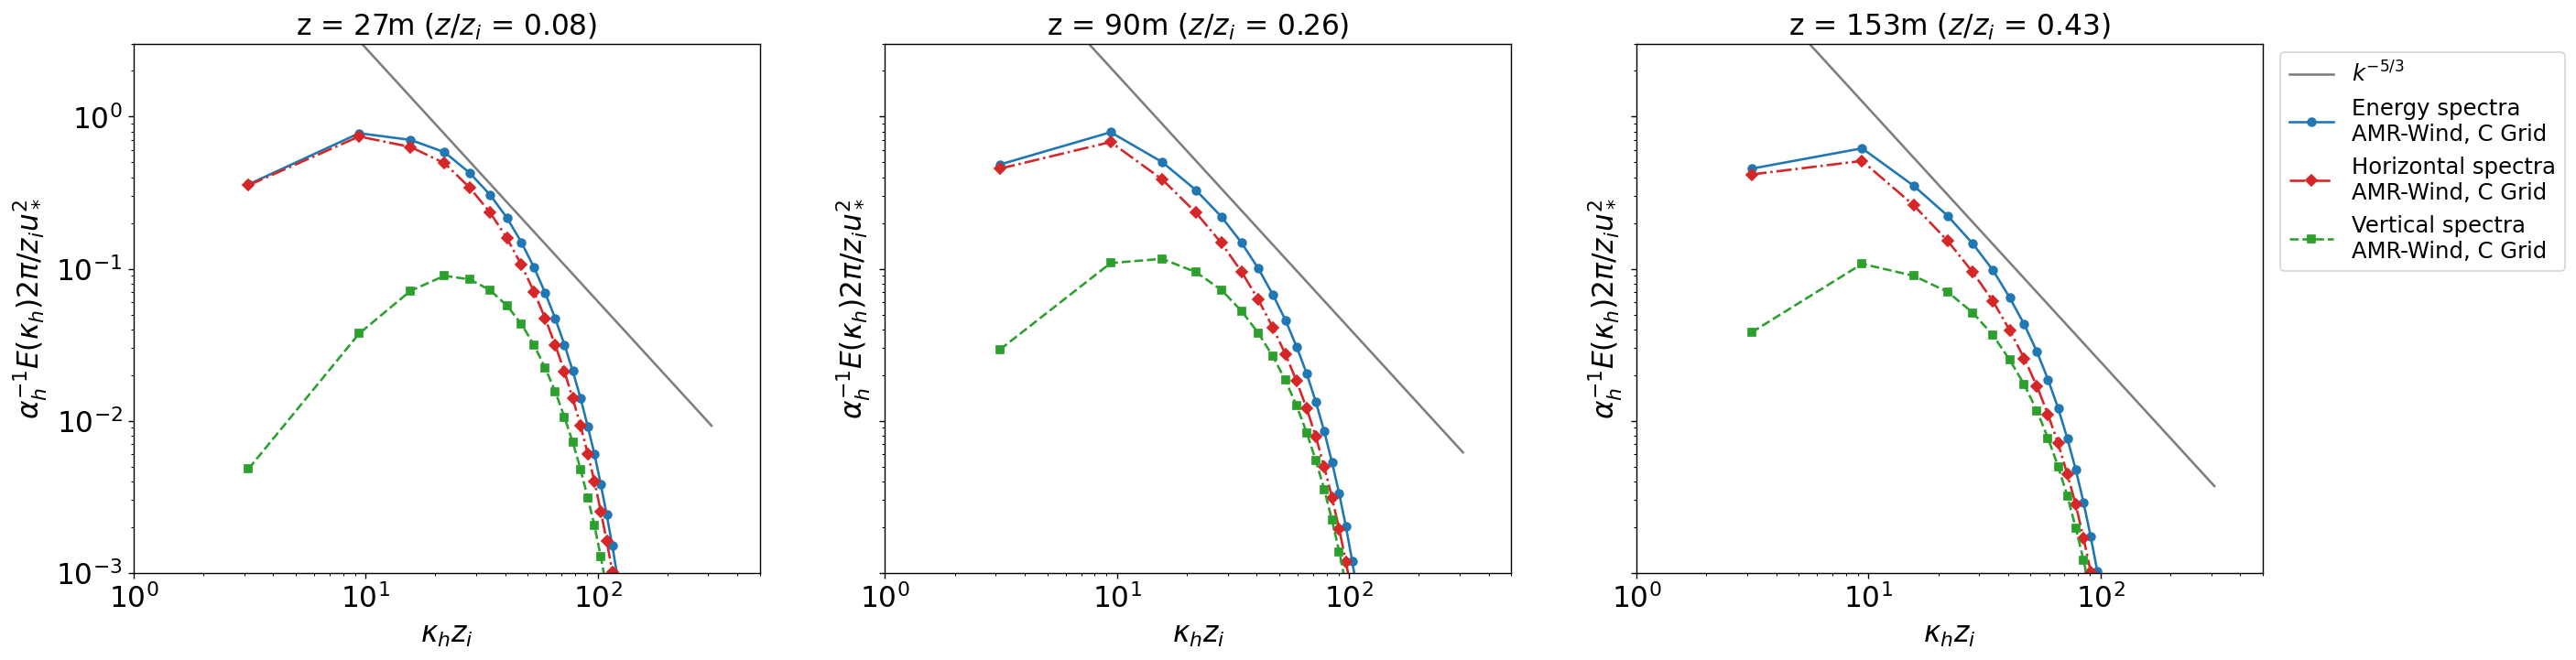

In [45]:
# Run the driver
fig, axs = plt.subplots(1,3,figsize=(8*3,6), dpi=125, sharey=True)
fsize = 18
s=12
dfs_C = [df_27_C,df_90_C,df_153_C]
zs = [27,90,153]
fact = [0.0075,0.005,0.003]
for axiter, ax in enumerate(axs):
    plt.sca(ax)
    df_C = dfs_C[axiter]
    normz = zs[axiter]/zi_C
    strz = f"{normz:.2f}"
    ax.set_title('z = '+str(zs[axiter])+'m ($z/z_i$ = ' + strz + ')',fontsize=fsize)
    Escaling_C =  2 * np.pi / (zi_C * ustar_C**2 * ah) 
    kscaling_C = zi_C

    plt.xticks(fontsize=fsize)  # Set x tick label font size
    plt.yticks(fontsize=fsize)  # Set y tick label font size

    msize = 5
    plt.loglog(kscaling_C * df_C['kmag'],fact[axiter]*df_C['kmag']**(-5/3),c='tab:gray',ls='-',label='$k^{-5/3}$')

    plt.loglog(kscaling_C * df_C['kmag'],Escaling_C * df_C['energy'],c='tab:blue',label='Energy spectra\nAMR-Wind, C Grid',marker='o',markersize=msize,ls='-')
    plt.loglog(kscaling_C * df_C['kmag'],Escaling_C * df_C['horiz'],c='tab:red',label='Horizontal spectra\nAMR-Wind, C Grid',marker='D',markersize=msize,ls='-.')
    plt.loglog(kscaling_C * df_C['kmag'],Escaling_C * df_C['vertical'],c='tab:green',label='Vertical spectra\nAMR-Wind, C Grid',marker='s',markersize=msize,ls='--')

    plt.ylabel("$\\alpha_h^{-1} E(\kappa_h)2\pi/z_i u_*^2$",fontsize =fsize)
    plt.xlabel("$\kappa_h z_i$",fontsize=fsize)
    if axiter == 2:
        plt.legend(loc=4,fontsize=fsize-4,bbox_to_anchor=(1.5,0.55))

    ax.set_xlim(1,500)
    ax.set_ylim(0.001,3)


### Energy Spectra (C and D grid)

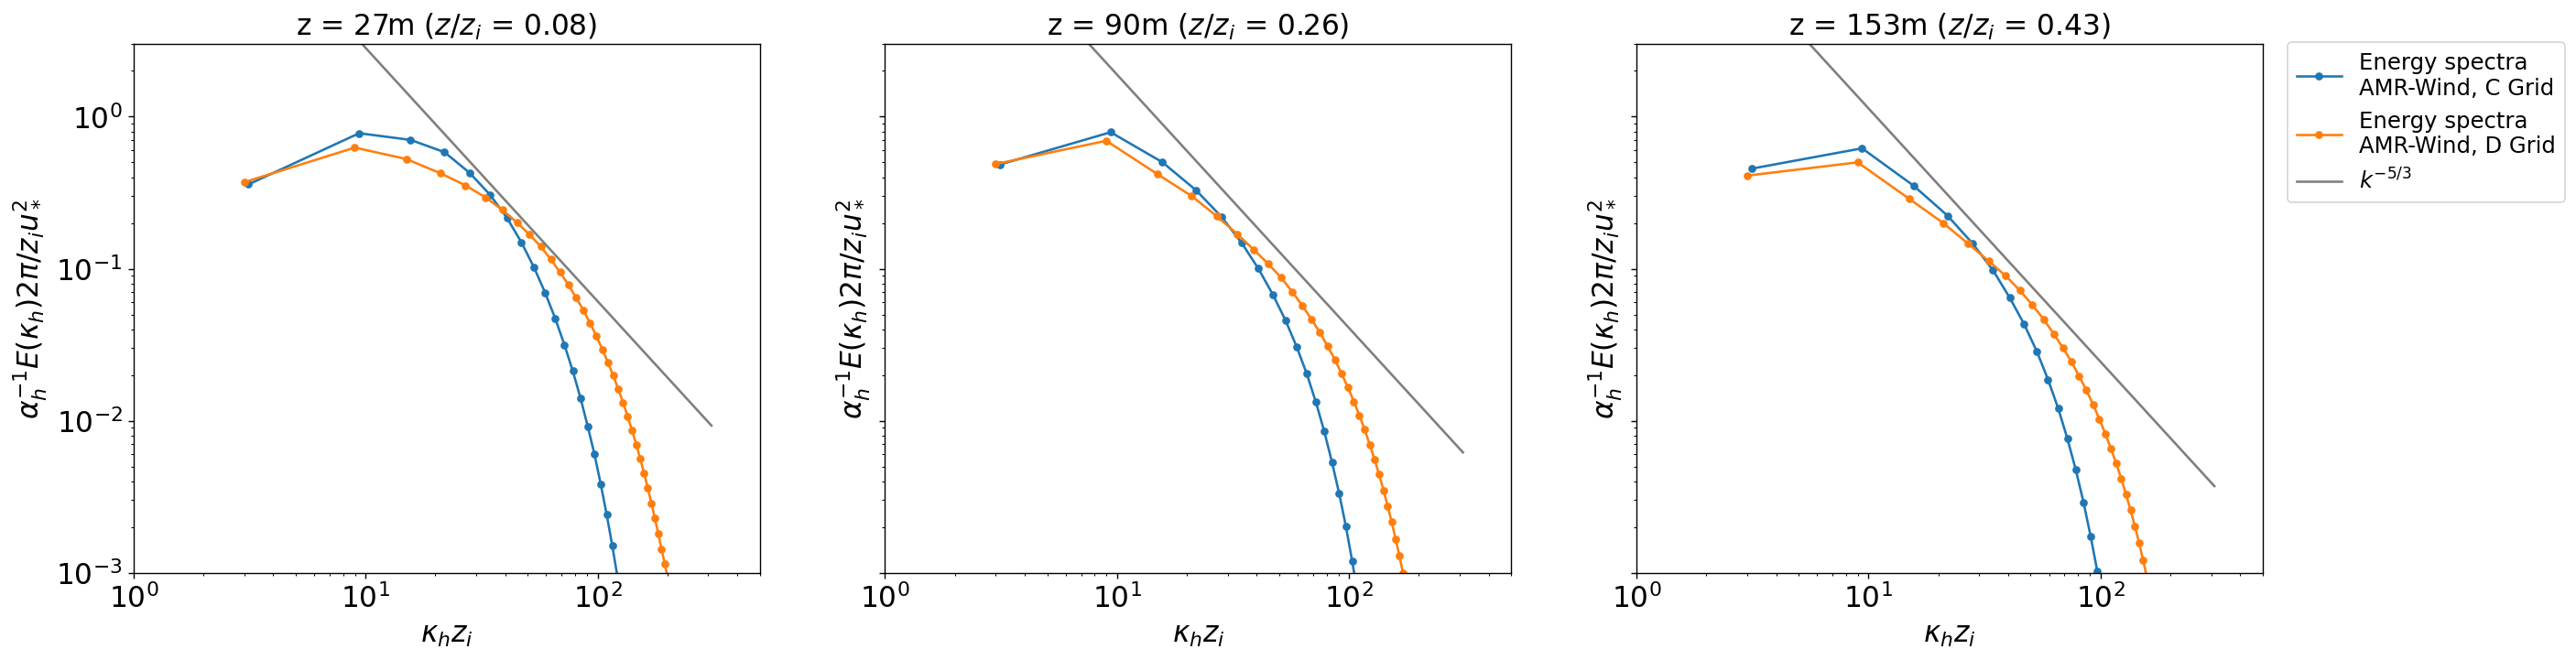

In [41]:
# Run the driver
fig, axs = plt.subplots(1,3,figsize=(8*3,6), dpi=125, sharey=True)

fsize = 18
s=12
dfs_C = [df_27_C,df_90_C,df_153_C]
dfs_D = [df_27_D,df_90_D,df_153_D]
zs = [27,90,153]
fact = [0.0075,0.005,0.003]
for axiter, ax in enumerate(axs):
    plt.sca(ax)
    df_C = dfs_C[axiter]
    df_D = dfs_D[axiter]
    normz = zs[axiter]/zi_C
    normz_D = zs[axiter]/zi_D
    strz = f"{normz:.2f}"
    ax.set_title('z = '+str(zs[axiter])+'m ($z/z_i$ = ' + strz + ')',fontsize=fsize)
    #plt.scatter(df['kmag'],10**9 * df['kol'],c='k',s=s)
    #Escaling = 1.0 / (w**2)
    #Escaling = dkA / (w**2)
    #Escaling = dkA * 2 * np.pi / ( Lx * w**2) 
    Escaling_C =  2 * np.pi / (zi_C * ustar_C**2 * ah) 
    Escaling_D =  2 * np.pi / (zi_D * ustar_D**2 * ah) 
    kscaling_C = zi_C
    kscaling_D = zi_D

    plt.xticks(fontsize=fsize)  # Set x tick label font size
    plt.yticks(fontsize=fsize)  # Set y tick label font size

    msize = 4
    #print(np.max(df['kmag']),np.max(df['kmag'])*zi)
    plt.loglog(kscaling_C * df_C['kmag'],Escaling_C * df_C['energy'],c='tab:blue',label='Energy spectra\nAMR-Wind, C Grid',marker='o',markersize=msize)

    plt.loglog(kscaling_D * df_D['kmag'],Escaling_D * df_D['energy'],c='tab:orange',label='Energy spectra\nAMR-Wind, D Grid',marker='o',markersize=msize)

    plt.loglog(kscaling_C * df_C['kmag'],fact[axiter]*df_C['kmag']**(-5/3),c='tab:gray',ls='-',label='$k^{-5/3}$')
    plt.ylabel("$\\alpha_h^{-1} E(\kappa_h)2\pi/z_i u_*^2$",fontsize =fsize)
    plt.xlabel("$\kappa_h z_i$",fontsize=fsize)
    if axiter == 2:
        plt.legend(loc=4,fontsize=fsize-4,bbox_to_anchor=(1.5,0.68))

    ax.set_xlim(1,500)
    ax.set_ylim(0.001,3)



### Horizontal and vertical spectra (C and D grid)

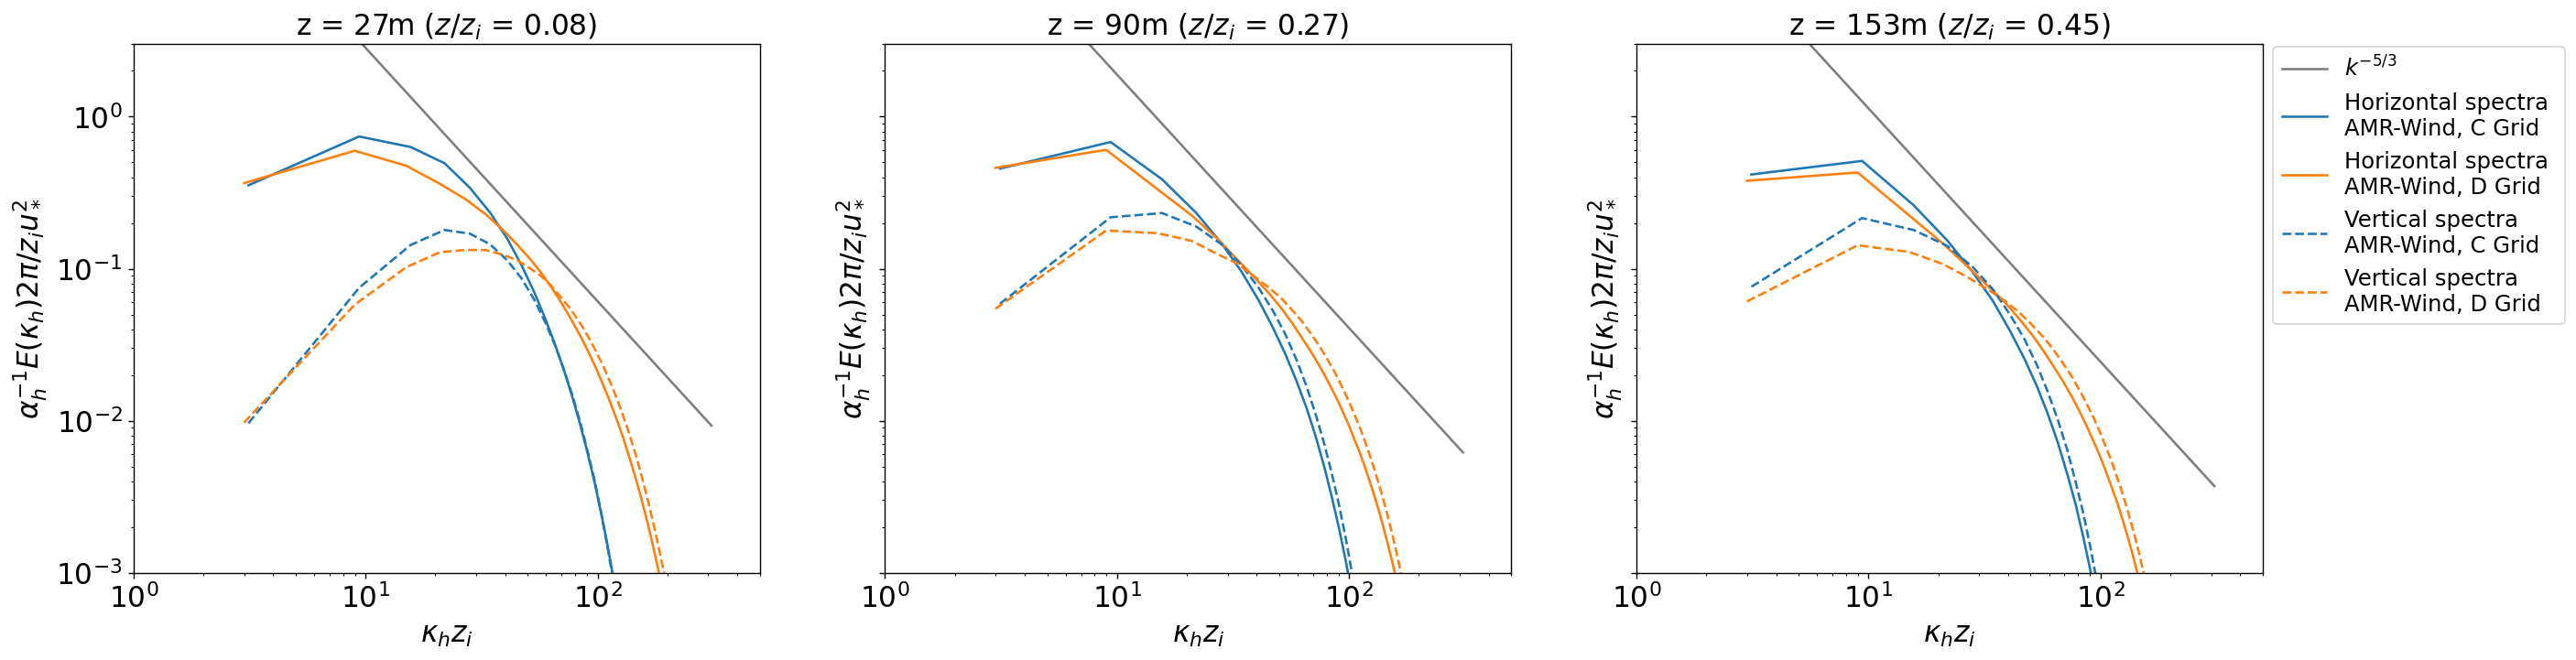

In [38]:
# Run the driver
fig, axs = plt.subplots(1,3,figsize=(8*3,6), dpi=125, sharey=True)

fsize = 18
s=12
dfs_C = [df_27_C,df_90_C,df_153_C]
dfs_D = [df_27_D,df_90_D,df_153_D]
zs = [27,90,153]
fact = [0.0075,0.005,0.003]
for axiter, ax in enumerate(axs):
    plt.sca(ax)
    df_C = dfs_C[axiter]
    df_D = dfs_D[axiter]
    normz_C = zs[axiter]/zi_C
    normz = zs[axiter]/zi_D
    strz = f"{normz:.2f}"
    ax.set_title('z = '+str(zs[axiter])+'m ($z/z_i$ = ' + strz + ')',fontsize=fsize)
    Escaling_C =  2 * np.pi / (zi_C * ustar_C**2 * ah) 
    Escaling_D =  2 * np.pi / (zi_D * ustar_D**2 * ah) 
    kscaling_C = zi_C
    kscaling_D = zi_D

    plt.xticks(fontsize=fsize)  # Set x tick label font size
    plt.yticks(fontsize=fsize)  # Set y tick label font size

    msize = 4
    plt.loglog(kscaling_C * df_C['kmag'],fact[axiter]*df_C['kmag']**(-5/3),c='tab:gray',ls='-',label='$k^{-5/3}$')

    plt.loglog(kscaling_C * df_C['kmag'],Escaling_C * df_C['horiz'],c='tab:blue',label='Horizontal spectra \nAMR-Wind, C Grid',ls='-')
    plt.loglog(kscaling_D * df_D['kmag'],Escaling_D * df_D['horiz'],c='tab:orange',label='Horizontal spectra\nAMR-Wind, D Grid',ls='-')

    plt.loglog(kscaling_C * df_C['kmag'],2 * Escaling_C * df_C['vertical'],c='tab:blue',label='Vertical spectra\nAMR-Wind, C Grid',ls='--')
    plt.loglog(kscaling_D * df_D['kmag'],2 * Escaling_D * df_D['vertical'],c='tab:orange',label='Vertical spectra\nAMR-Wind, D Grid',ls='--')

    plt.ylabel("$\\alpha_h^{-1} E(\kappa_h)2\pi/z_i u_*^2$",fontsize =fsize)
    plt.xlabel("$\kappa_h z_i$",fontsize=fsize)
    if axiter == 2:
        plt.legend(loc=4,fontsize=fsize-4,bbox_to_anchor=(1.5,0.45))

    ax.set_xlim(1,500)
    ax.set_ylim(0.001,3)



### Comparisons with Berg et. al. (2020), D grid

In [7]:
#Load Berg Spectra
berg_D_0p1_horiz     = pd.read_csv('../results/horiz_spectra_D_berg_0p1.csv')
berg_D_0p1_vertical  = pd.read_csv('../results/vertical_spectra_D_berg_0p1.csv')

berg_D_0p5_horiz     = pd.read_csv('../results/horiz_spectra_D_berg_0p5.csv')
berg_D_0p5_vertical  = pd.read_csv('../results/vertical_spectra_D_berg_0p5.csv')

berg_D_0p9_horiz     = pd.read_csv('../results/horiz_spectra_D_berg_0p9.csv')
berg_D_0p9_vertical  = pd.read_csv('../results/vertical_spectra_D_berg_0p9.csv')

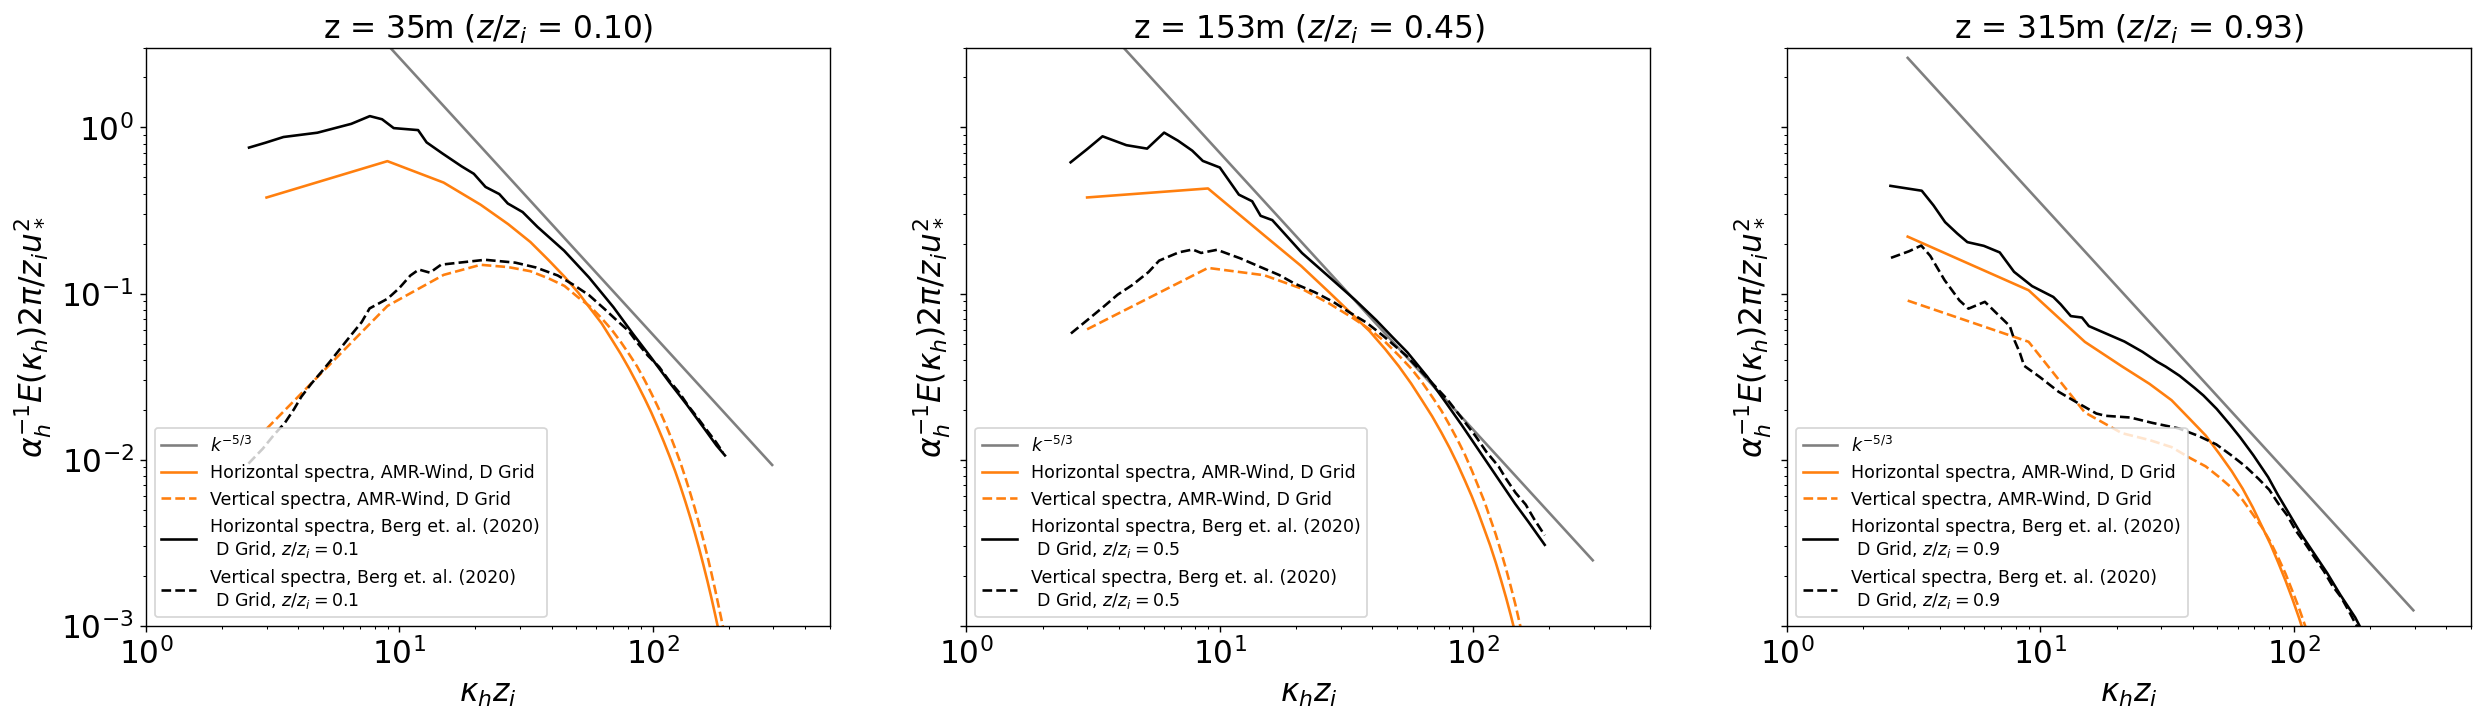

In [54]:


# Run the driver
fig, axs = plt.subplots(1,3,figsize=(8*3,6), dpi=125, sharey=True)

fsize = 18
s=12
dfs_D = [df_35_D,df_153_D,df_315_D]
dfs_berg_horiz = [berg_D_0p1_horiz,berg_D_0p5_horiz,berg_D_0p9_horiz]
dfs_berg_vertical = [berg_D_0p1_vertical,berg_D_0p5_vertical,berg_D_0p9_vertical]
berg_zizh = [0.1,0.5,0.9]
zs = [35,153,315]
fact = [0.0075,0.002,0.001]
for axiter, ax in enumerate(axs):
    plt.sca(ax)
    df_D = dfs_D[axiter]
    df_berg_horiz = dfs_berg_horiz[axiter]
    df_berg_vertical = dfs_berg_vertical[axiter]
    normz = zs[axiter]/zi_D
    strz = f"{normz:.2f}"
    ax.set_title('z = '+str(zs[axiter])+'m ($z/z_i$ = ' + strz + ')',fontsize=fsize)
    Escaling_D =  2 * np.pi / (zi_D * ustar_D**2 * ah) 
    kscaling_D = zi_D
    plt.xticks(fontsize=fsize)  # Set x tick label font size
    plt.yticks(fontsize=fsize)  # Set y tick label font size

    msize = 4
    plt.loglog(kscaling_D * df_D['kmag'],fact[axiter]*df_D['kmag']**(-5/3),c='tab:gray',ls='-',label='$k^{-5/3}$')
    plt.loglog(kscaling_D * df_D['kmag'],Escaling_D * df_D['horiz'],c='tab:orange',label='Horizontal spectra, AMR-Wind, D Grid',ls='-')
    plt.loglog(kscaling_D * df_D['kmag'],2 * Escaling_D * df_D['vertical'],c='tab:orange',label='Vertical spectra, AMR-Wind, D Grid',ls='--')

    plt.loglog(df_berg_horiz['X'],df_berg_horiz['Y'],c='k',label='Horizontal spectra, Berg et. al. (2020)\n D Grid, $z/z_i=$' + str(berg_zizh[axiter]),ls='-')
    plt.loglog(df_berg_vertical['X'],df_berg_vertical['Y'],c='k',label='Vertical spectra, Berg et. al. (2020)\n D Grid, $z/z_i=$' + str(berg_zizh[axiter]),ls='--')

    plt.ylabel("$\\alpha_h^{-1} E(\kappa_h)2\pi/z_i u_*^2$",fontsize =fsize)
    plt.xlabel("$\kappa_h z_i$",fontsize=fsize)
    plt.legend(loc=3,fontsize=fsize-8)
    #if axiter == 2:
    #    plt.legend(loc=4,fontsize=fsize-4,bbox_to_anchor=(1.5,0.35))

    ax.set_xlim(1,500)
    ax.set_ylim(0.001,3)

